# Feature Importance with SHAP values

In [2]:
# Imports
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.inspection import permutation_importance
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

## Step 0 -- Data Exploration & Preprocessing (copy)

In [5]:
# Penguin dataset
data_penguins = sns.load_dataset("penguins").dropna()
X_penguins = data_penguins.drop(columns="species")
y_penguins = data_penguins["species"]
X_penguins = pd.get_dummies(X_penguins) # one-hot encode categorical features

# Student performance dataset
data_students = fetch_ucirepo(id=320) 
X_students = data_students.data.features 
Y_students = data_students.data.targets 
X_students = pd.get_dummies(X_students) # one-hot encode categorical features

# Digits dataset
data_digits = load_digits()
X_digits = data_digits.data
y_digits = data_digits.target

# Step 2 -- Feature Importance with SHAP values

SHAP (SHapley Additive exPlanations) is a unified framework for interpreting model predictions.  
It assigns each feature an importance value for a given prediction based on ideas from cooperative game theory.

Key Ideas:
- Each feature is viewed as a "player" in a game.
- The "payout" is the model's prediction.
- SHAP computes how much each feature contributes to the prediction, fairly, by averaging over all possible feature combinations.

Why SHAP?
- Works for both classification and regression.
- Offers **global** (feature-level) and **local** (instance-level) explanations.
- The TreeExplainer variant is efficient for tree-based models (like Random Forests).


#### Penguins

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_penguins, y_penguins, random_state=42)

# Fit model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# SHAP explainer
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

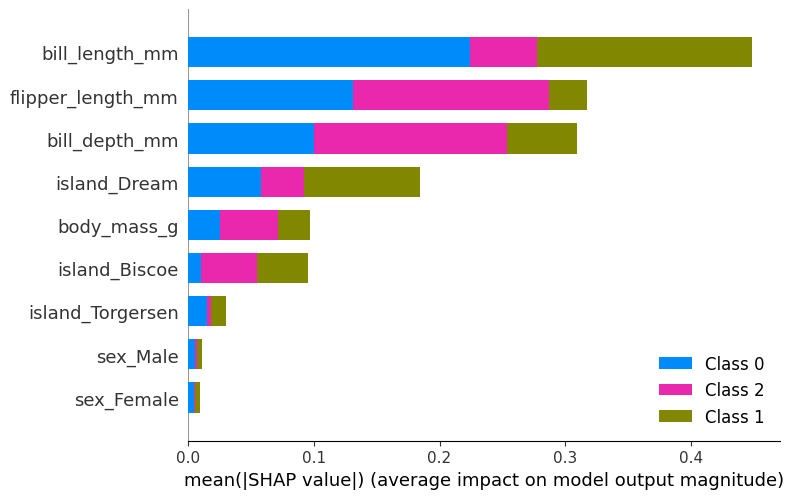

In [17]:
# create summary plot for overall feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)